# Model Trial #5
## Purpose: 
The purpose of this trial will be to explore the potential of machine learning to predict deaths based on population density and other information related to population size. Additionally, information from states containing vaccinations was purposely withheld in order to assess its influences of the predictive abilites of the model. 

- This Trial will also avoid using the StandardScaler in order to remedy the errors of the first trial.
- This trial will utilize the finding from Trial 4 regarding the importance of certain features and drop unnecessary features in attempt to improve the model's accuracy.


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib import pyplot as plt

In [4]:
#Creating a DataFrame using the read_excel function from pandas
df = pd.read_csv("/Users/origi/Documents/Data Bootcamp/Final Challenge/Research Data/final_covid19.csv")

#Showing all 50 points of data from the DataFrame
df.head(50)

,state,infected,deaths,population,pop_density,gini,icu_beds,unemployment,hospitals,health_spending,pollution,Med-large_airports,total_vaccines_administered,recipients_one_dose,fully_vaccinated
0,Alabama,1511092,20321,4908621,96.9221,0.4847,1533,2.7,101,7281,8.1,1.0,"6,087,103","3,031,464","2,459,363"
1,Alaska,302448,1321,734002,1.2863,0.4081,119,5.8,21,11064,6.4,1.0,"1,093,808","500,864","445,530"
2,Arizona,2264159,31244,7378494,64.9550,0.4713,1559,4.5,83,6452,9.7,1.0,"11,508,661","5,191,587","4,364,444"
3,Arkansas,943944,11970,3038999,58.4030,0.4719,732,3.5,88,7408,7.1,0.0,"4,081,816","1,981,905","1,612,690"
4,California,11171759,95620,39937489,256.3727,0.4899,7338,3.9,359,7549,12.8,9.0,"71,306,336","32,284,670","27,773,615"
5,Colorado,1649212,13426,5845526,56.4011,0.4586,1597,2.5,89,6804,6.7,1.0,"10,299,034","4,507,596","3,980,992"
6,Connecticut,885767,11317,3563077,735.8689,0.4945,674,3.8,32,9859,7.2,1.0,"7,277,732","3,345,245","2,771,081"
7,Delaware,305284,3080,982895,504.3073,0.4522,186,3.9,7,10254,8.3,0.0,"1,729,273","794,932","656,886"
8,Florida,7082717,80647,21992985,410.1256,0.4852,5604,2.8,217,8076,7.4,7.0,"36,035,360","16,742,736","14,140,484"
9,Georgia,2809555,38468,10736059,186.6719,0.4813,2508,3.1,145,6587,8.3,1.0,"14,324,212","6,823,694","5,684,843"


In [5]:
# Setting the State name as the index and data types since new data was imported
s_df = df.set_index('state')
s_df.index.name = "State"
s_df.dtypes

infected                         int64
deaths                           int64
population                       int64
pop_density                    float64
gini                           float64
icu_beds                         int64
unemployment                   float64
hospitals                        int64
health_spending                  int64
pollution                      float64
Med-large_airports             float64
total_vaccines_administered     object
recipients_one_dose             object
fully_vaccinated                object
dtype: object

 **Note**:
As can be seen above, there are no string values that need to be converted into numerical values. However, there are commas separating the thousands place in the newly imported vaccination data. Therefore, the next step can only be proceeded once this is dealt with; the next step will involve creating the features and target.

In [6]:
# Preprocessing the data
Total_Vaccines = [int(i.replace(',','')) for i in df.total_vaccines_administered]
One_Dose = [int(i.replace(',','')) for i in df.recipients_one_dose]
GPS_Complete = [int(i.replace(',','')) for i in df.fully_vaccinated]
# print(Total_Vaccines, One_Dose, GPS_Complete) # Checking that the data was processed properly

# Creating series so that the vaccine data can be re-added to the main DataFrame
Tot_vax = pd.Series(Total_Vaccines)
One_dose = pd.Series(One_Dose)
Fully_vax = pd.Series(GPS_Complete)

# Adding the processed data back to the DataFrame and dropping the old columns
s_df["Total Vaccines Administered "] = Tot_vax.values
s_df["Partially Vaccinated"] = One_dose.values
s_df["Fully Vaccinated"] = Fully_vax.values
s_df.drop('total_vaccines_administered', axis=1, inplace=True)
s_df.drop('recipients_one_dose', axis=1, inplace=True)
s_df.drop('fully_vaccinated', axis=1, inplace=True)
s_df.drop('gini', axis=1, inplace=True)
s_df.drop('pollution', axis=1, inplace=True)
s_df.drop('Med-large_airports', axis=1, inplace=True)
s_df.drop('icu_beds', axis=1, inplace=True)
s_df.drop('unemployment', axis=1, inplace=True)
s_df.drop('hospitals', axis=1, inplace=True)
s_df.dtypes

infected                          int64
deaths                            int64
population                        int64
pop_density                     float64
health_spending                   int64
Total Vaccines Administered       int64
Partially Vaccinated              int64
Fully Vaccinated                  int64
dtype: object

In [23]:
# Creating the DataFrame that contains the desired features
X = s_df.drop(columns="deaths")

# Creating the DataFrame that contains the desired target
y = pd.DataFrame(s_df["deaths"])

X.head(50)

,infected,population,pop_density,health_spending,Total Vaccines Administered,Partially Vaccinated,Fully Vaccinated
State,,,,,,,
Alabama,1511092,4908621,96.9221,7281,6087103,3031464,2459363
Alaska,302448,734002,1.2863,11064,1093808,500864,445530
Arizona,2264159,7378494,64.9550,6452,11508661,5191587,4364444
Arkansas,943944,3038999,58.4030,7408,4081816,1981905,1612690
California,11171759,39937489,256.3727,7549,71306336,32284670,27773615
Colorado,1649212,5845526,56.4011,6804,10299034,4507596,3980992
Connecticut,885767,3563077,735.8689,9859,7277732,3345245,2771081
Delaware,305284,982895,504.3073,10254,1729273,794932,656886
Florida,7082717,21992985,410.1256,8076,36035360,16742736,14140484


In [8]:
# Inspecting the dataset's statistical information. 
X.describe()

,infected,population,pop_density,health_spending,Total Vaccines Administered,Partially Vaccinated,Fully Vaccinated
count,5.000000e+01,5.000000e+01,50.000000,50.00000,5.000000e+01,5.000000e+01,5.000000e+01
mean,1.880679e+06,6.611966e+06,203.900898,8259.92000,1.081412e+07,4.962015e+06,4.219923e+06
std,2.124986e+06,7.480025e+06,267.412842,1157.62658,1.286030e+07,5.887942e+06,5.017832e+06
min,1.412820e+05,5.670250e+05,1.286300,5982.00000,7.300020e+05,3.353480e+05,2.925550e+05
25%,5.491758e+05,1.857760e+06,47.706725,7381.00000,2.867728e+06,1.371978e+06,1.120493e+06
50%,1.341654e+06,4.572438e+06,107.783600,8091.50000,6.780690e+06,3.136708e+06,2.644973e+06
75%,2.214602e+06,7.692445e+06,219.566500,8917.50000,1.413467e+07,6.462332e+06,5.410640e+06
max,1.117176e+07,3.993749e+07,1215.199100,11064.00000,7.130634e+07,3.228467e+07,2.777362e+07


**Note**: As observed from the cell above, the variation between the columns/features is indeed large. This could have an affect on the end results and predictive abilities of the model. However, the features will not be scaled.

### Splitting into Train and Test sets

Now that both the features and target have been inspected, it is time to split the data into training and test sets. 

In [9]:
X_train = X.loc[["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Virginia", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]]
X_test = X.loc[["Utah", "Oregon", "Maine", "Connecticut", "Maryland", "Massachusetts"]]
y_train = y.loc[["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Virginia", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"], ["deaths"]]
y_test = y.loc[["Utah", "Oregon", "Maine", "Connecticut", "Maryland", "Massachusetts"],["deaths"]]

In [10]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [11]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [12]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Fitting the model
By this point, the data has been split into training and test sets. Thus, the model is ready to be fit to the training data.
- This trial avoids using the StandardScalar despite knowing the risk of certain features having larger biases that may be overwhelming when compared to the biases of other features; ultimately affecting the model and its predictive accurary. 

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Testing the model
The model has been fitted to the data. It's ready for death predictions. 

In [14]:
# Make a prediction
y_pred = model.predict(X_test)
y_pred

array([[10674.46200168],
       [ 8111.08337241],
       [ 2577.80154592],
       [11214.4239981 ],
       [13125.72721639],
       [22259.53887812]])

In [15]:
# Showing the predicted outputs
for i in range(len(X_test_scaled)):
    index = ["Utah", "Oregon", "Maine", "Connecticut", "Maryland", "Massachusetts"]
    print("Predicted deaths for " +index[i]+ "= %3d" % y_pred[i][0])

Predicted deaths for Utah= 10674
Predicted deaths for Oregon= 8111
Predicted deaths for Maine= 2577
Predicted deaths for Connecticut= 11214
Predicted deaths for Maryland= 13125
Predicted deaths for Massachusetts= 22259


### Assessing Feature importance 
After running the model and producing results, it's time to assess which of the features has the greatest impact towards the model's accuracy and increases losses.

Feature: 0, Score: 0.01192
Feature: 1, Score: 0.00246
Feature: 2, Score: 5.52019
Feature: 3, Score: 0.42464
Feature: 4, Score: -0.00238
Feature: 5, Score: 0.00078
Feature: 6, Score: 0.00075


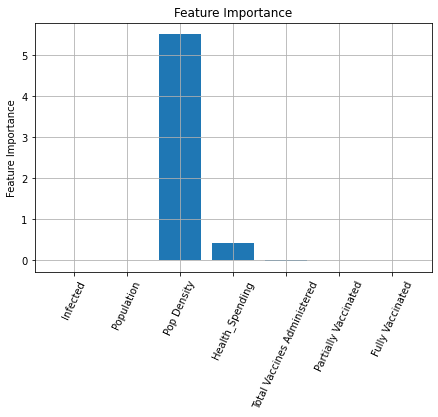

In [16]:
# Creating the variable that obtains the feature's importance to the model
importance = model.coef_

# The importance results are held within an array, array[0] accesses the first and only value which in this case is the list desired
Corrected_importance = importance[0]

# Summarizing the feature's importance
for i,v in enumerate(Corrected_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
# Plotting feature importance
plt.bar([x for x in range(len(Corrected_importance))], Corrected_importance)
plt.grid()
plt.tight_layout()
ind = np.arange(len(X.columns)) # Setting the locations for xticks
plt.xticks(ind,("Infected", "Population", "Pop Density","Health_Spending", "Total Vaccines Administered", "Partially Vaccinated", "Fully Vaccinated"), rotation=65)
plt.title("Feature Importance")
plt.ylabel("Feature Importance")
plt.show()

**Note**: Looking at the feature importance results, the column with the greatest influence to the model is population density followed by health spending. This was the desired outcome to see how well population density can help in predicting COVID 19 deaths. Although, there is now a great concern that too much data has been eliminated and may actually increase the error rather than decrease it. This theory will be analysis in the following results section.

### Results
The models results will now be tested for accuracy

In [17]:
# Setting up the data for analysis
Column_names = ['Predicted', 'Actual', 'State']
results = pd.DataFrame(y_pred)
results["test"] = y_test["deaths"].values
results["state"] = ["Utah", "Oregon", "Maine", "Connecticut", "Maryland", "Massachusetts"]
results.set_axis(Column_names, axis=1, inplace=True)

# Setting the State name as the index
y_results = results.set_index('State')
y_results.head()

,Predicted,Actual
State,,
Utah,10674.462002,4989
Oregon,8111.083372,8492
Maine,2577.801546,2561
Connecticut,11214.423998,11317
Maryland,13125.727216,15285


In [18]:
# Accuracy Calculations
realVals = y_results.Actual
predictedVals = y_results.Predicted

# Empty arrays holding the error data
abs_error_array = []
rel_error_array = []
per_error_array = []

# For loop that calculates the results for each state
for i in range(len(y_results)):
    abs_error_calc = round(abs(realVals[i] - predictedVals[i]))
    rel_error_calc = round(abs(((realVals[i] - predictedVals[i])/realVals[i])), 2)
    percent_error_calc = round(abs(((realVals[i] - predictedVals[i])/realVals[i])*100))
    std_calc = round(np.std([realVals[i], predictedVals[i]]))
    abs_error_array.append(abs_error_calc)
    rel_error_array.append(rel_error_calc)
    per_error_array.append(percent_error_calc)
    
# Creating series so that the errors can be added to the main DataFrame
abs_error = pd.Series(abs_error_array)
rel_error = pd.Series(rel_error_array)
per_error = pd.Series(per_error_array)

The metrics that were evaluated to test the model's accuracy are: Absolute Error, Relative Error, and Percent Error.

$\text{Absolute Error} = |V_{A} - V_{P}|$

$\text{Relative Error} = |\frac{V_{A} - V_{P}}{V_{A}}|$

$\text{Percent Error} = |\frac{V_{A} - V_{P}}{V_{A}}|*100\%$

$\text{Nomenclature}:$
- $V_{A} = \text{Acutal/Measured Value}$
- $V_{P} = \text{Predicted/Model Value}$

In [19]:
# Adding the calculations to the results DataFrame
y_results["Absolute Error"] = abs_error.values
y_results["Relative Error"] = rel_error.values
y_results["Percent Error"] = per_error.values
y_results

,Predicted,Actual,Absolute Error,Relative Error,Percent Error
State,,,,,
Utah,10674.462002,4989,5685,1.14,114
Oregon,8111.083372,8492,381,0.04,4
Maine,2577.801546,2561,17,0.01,1
Connecticut,11214.423998,11317,103,0.01,1
Maryland,13125.727216,15285,2159,0.14,14
Massachusetts,22259.538878,21536,724,0.03,3


In [20]:
# Formatting the DataFrame 
y_results["Predicted"] = y_results["Predicted"].map("{:.0f}".format)
y_results["Actual"] = y_results["Actual"]
y_results["Absolute Error"] = y_results["Absolute Error"]
y_results["Relative Error"] = y_results["Relative Error"]
y_results["Percent Error"] = y_results["Percent Error"]
y_results

# Creating the output file (CSV)
output_data_file = "/Users/origi/Documents/Data Bootcamp/Final Challenge/Final Challenge Code/Trail_5_results.csv"
# Exporting the results into a CSV.
y_results.to_csv(output_data_file)

### Conclusion
The model provided great results; the predictive accuray of the model has significantly increased after removing the columns identified in the last trial. Although, the analytics metrics utilized demonstrate that the error actually increased for states like Utah in a very drastic measure, however, the cause of this is unknown. States with similar population densities to Utah such as Oregon and Maine obtained great predictive results. Knowning this only amplifies the pending question of what caused the error for Utah to increase so much?
- The answer is currently unknown and needs to be investigated further. From a quick overlook of the data stats and the inputs that were placed into the model, nothing can be easily picked out. 

On a good note though, the model is fairly accurate and seems like it will work for most states.